# 2022-07-27
## K-평균 클러스터링 

In [1]:
from sklearn import cluster 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# k-평균 클러스터링에 사용할 임의 데이터 생성 
dataset = pd.DataFrame({
    'x' : [11,21,28, 17, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 62, 70, 72, 10], 
    'y' : [39, 36, 30, 52, 53, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 18, 7, 24, 10]
})

# 클러스터 갯수 k 임의로 설정하기: 3 
kmeans = cluster.KMeans(n_clusters=3)

# k-평균 클러스터링 실행
kmeans.fit(dataset)

KMeans(n_clusters=3)

In [3]:
dataset 

,x,y
0,11,39
1,21,36
2,28,30
3,17,52
4,29,53
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


In [4]:
# 각 벡터 점이 어떤 클러스터로 '클러스터링' 되었나? 
labels = kmeans.labels_
pd.DataFrame({
    'vector' : list(range(20)), 
    'result_clustered' : labels 
})

,vector,result_clustered
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
5,5,2
6,6,2
7,7,0
8,8,0
9,9,0


In [5]:
# 클러스터 별 중심점; 3개 중심점. 
centers = kmeans.cluster_centers_
print(centers)

pd.DataFrame({
    'vector' : list(range(3)), 
    'x_coordinate' : [centers[x][0] for x in range(3)], 
    'y_coodinate' : [centers[y][1] for y in range(3)]
})

[[50.         63.16666667]
 [62.16666667 15.66666667]
 [21.625      40.125     ]]


,vector,x_coordinate,y_coodinate
0,0,50.000000,63.166667
1,1,62.166667,15.666667
2,2,21.625000,40.125000


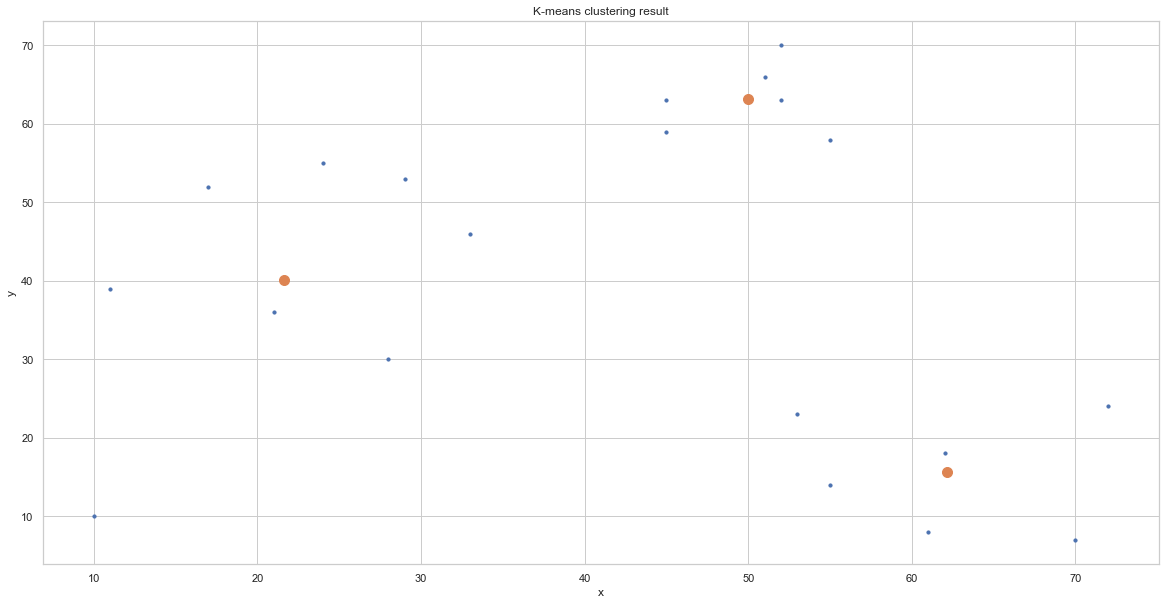

In [6]:
# 클러스터 시각화 
%matplotlib inline
plt.figure(figsize=(20,10))
plt.scatter(dataset['x'], dataset['y'], s=10)
plt.scatter([centers[x][0] for x in range(3)], [centers[y][1] for y in range(3)], s=100)
plt.title('K-means clustering result')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
# 클러스터링 결과 품질 평가 방법: 실루엣 분석 
from sklearn.metrics import silhouette_samples, silhouette_score

ss = silhouette_samples(dataset, labels);print(ss);print()
ss2 = silhouette_score(dataset, labels) ; print(ss2)

[0.56696738 0.57743412 0.44825528 0.45067759 0.17040846 0.20428702
 0.28313587 0.7177684  0.77066252 0.78630094 0.83981177 0.84146727
 0.75371487 0.59110102 0.7231076  0.75778881 0.77111825 0.73332291
 0.61443136 0.288133  ]

0.5944947210534494


In [8]:
clusterss = pd.DataFrame({
    'sil' : ss, 
    'label' : labels
}) ; clusterss

,sil,label
0,0.566967,2
1,0.577434,2
2,0.448255,2
3,0.450678,2
4,0.170408,2
5,0.204287,2
6,0.283136,2
7,0.717768,0
8,0.770663,0
9,0.786301,0


0.7849542950490097
0.6984783222060621
0.37366233969231955
실루엣 계수 전체 평균 : 0.5944947210534494


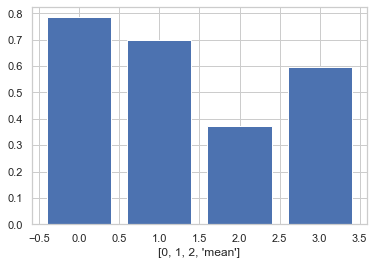

In [9]:
# 0 클러스터 실루엣 계수 평균
cluster_zero_mean = clusterss.query('label == 0')['sil'].values.mean() ; print(cluster_zero_mean)

# 1 클러스터 실루엣 계수 평균
cluster_zero_one = clusterss.query('label == 1')['sil'].values.mean() ; print(cluster_zero_one)

# 2 클러스터 실루엣 계수 평균
cluster_zero_two = clusterss.query('label == 2')['sil'].values.mean() ; print(cluster_zero_two)

print(f'실루엣 계수 전체 평균 : {ss2}')

plt.bar(range(4), [cluster_zero_mean, cluster_zero_one, cluster_zero_two, ss2])
plt.xlabel([0,1,2,'mean'])
plt.show()

# 실루엣 계수 정리 
개별 데이터 포인트(벡터)의 실루엣 계수: 개별 데이터 포인트의 '군집도'. 

- 같은 군집 내의 데이터들과 얼마나 가깝게 군집화 되어 있고, 다른 군집에 속한 데이터와는 얼마나 멀리 분리되어 있는지 동시에 나타내는 지표다. 
- 실루엣 계수값이 1에 가까울 수록 근처 군집과는 멀리, 군집 내에서는 다른 점들과 가까이 위치한다는 뜻이다. 
- 실루엣 계수값이 0에 가까울 수록 근처 군집과 가깝고, 군집 내에서 다른 점들과 멀다는 뜻이다. 
- 실루엣 계수값이 -1 이면 데이터 포인트가 아예 다른 군집에 잘못 클러스터링 되었음을 뜻한다. 

### '좋은 군집화' 2가지 조건 

1. 전체 데이터 포인트에 대한 실루엣 계수 평균값(전체적으로 데이터가 클러스터링 잘 된 정도)이 1에 가까워야 한다. 
2. 전체 실루엣 계수 평균값과 각 개별 군집의 실루엣 계수 평균값 사이 편차가 크지 않아야 한다. 

한편 개별 군집의 실루엣 계수 평균값이 0에 가까우면 다른 클러스터로 부터 제대로 떨어져 나오지 못한 군집, 1에 가까우면 확실히 분리된(clear-cut) 한 군집이다. 



# 계층적 클러스터링 알고리즘 
### 가장 가까운 두 클러스터끼리 묶어나가는 알고리즘

In [10]:
from sklearn.cluster import AgglomerativeClustering 

# 임의 2차원 벡터 20개 생성
dataset = pd.DataFrame({
    'x' : [11, 21, 28, 17, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 62, 70, 72, 10], 
    'y' : [39, 36, 30, 52, 53, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 18, 7, 24, 10]
})
dataset

,x,y
0,11,39
1,21,36
2,28,30
3,17,52
4,29,53
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


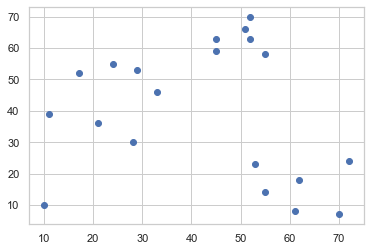

In [11]:
plt.scatter(dataset['x'], dataset['y'])

In [12]:
# 하이퍼파라미터 지정 
# 개별 벡터 간 유사도: 벡터간 유클리드 거리로 측정. # 클러스터 간 거리 측정방식: 클러스터에 속한 벡터간 거리 평균

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(dataset) # 20개 벡터에 대해 계층적 클러스터링 실행 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1],
      dtype=int64)

In [13]:
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 1]


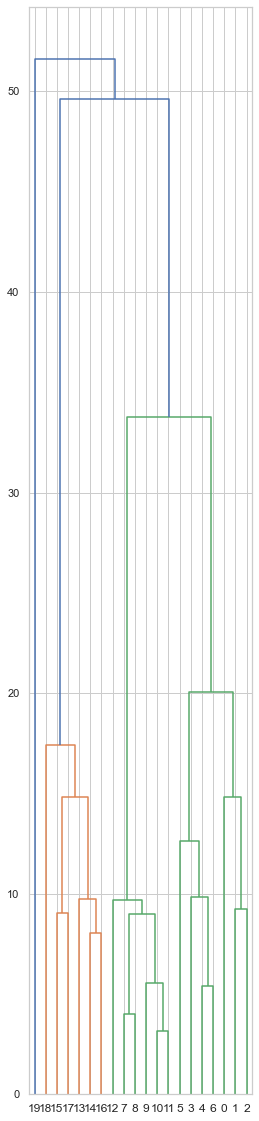

In [14]:
# 덴드로그램 시각화; 계층적 클러스터링 결과 시각화 

from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(dataset, method='average')

# 덴드로그램 그리기 
plt.figure(figsize=(4, 20))
dendrogram(mergings)
plt.show()

# ---
# 2022-07-28 

In [18]:
import pyfpgrowth as fp 

# 입력 데이터 
dict1 = {
    'id' : [0,1,2,3], 
    'items' : [['wicket', 'pads'], 
    ['bat', 'wickets', 'pads', 'helmet'], 
    ['helmet', 'pads'], 
    ['bat', 'pads', 'helmet']] 
}
transactionset = pd.DataFrame(dict1) ; transactionset

,id,items
0,0,"[wickets, pads]"
1,1,"[bat, wickets, pads, helmet]"
2,2,"[helmet, pads]"
3,3,"[bat, pads, helmet]"


In [2]:
import pyfpgrowth as fp 
dict2 = {
    'id' : [0,1,2,3], 
    'items' : [['wickets', 'pads'], 
    ['bat', 'wickets', 'pads', 'helmet'], 
    ['helmet', 'ball'], 
    ['bat', 'pads', 'helmet']]
}
transactionset = pd.DataFrame(dict2) ; transactionset

,id,items
0,0,"[wickets, pads]"
1,1,"[bat, wickets, pads, helmet]"
2,2,"[helmet, ball]"
3,3,"[bat, pads, helmet]"


In [3]:
# 빈출패턴 찾기. 최소빈도 = 1
patterns = fp.find_frequent_patterns(transactionset['items'], 1) ; patterns # 패턴 별 빈도 출력 

{('ball',): 1,
 ('ball', 'helmet'): 1,
 ('wickets',): 2,
 ('pads', 'wickets'): 2,
 ('bat', 'wickets'): 1,
 ('helmet', 'wickets'): 1,
 ('bat', 'pads', 'wickets'): 1,
 ('helmet', 'pads', 'wickets'): 1,
 ('bat', 'helmet', 'wickets'): 1,
 ('bat', 'helmet', 'pads', 'wickets'): 1,
 ('bat',): 2,
 ('bat', 'helmet'): 2,
 ('bat', 'pads'): 2,
 ('bat', 'helmet', 'pads'): 2,
 ('pads',): 3,
 ('helmet',): 3,
 ('helmet', 'pads'): 2}

In [4]:
# 빈출패턴으로부터 연관규칙찾기 
rules = fp.generate_association_rules(patterns, 0) # 신뢰도 0.3 이상인 연관규칙만 생성
rules 

{('ball',): (('helmet',), 1.0),
 ('helmet',): (('pads',), 0.6666666666666666),
 ('pads',): (('helmet',), 0.6666666666666666),
 ('wickets',): (('bat', 'helmet', 'pads'), 0.5),
 ('bat',): (('helmet', 'pads'), 1.0),
 ('bat', 'pads'): (('helmet',), 1.0),
 ('bat', 'wickets'): (('helmet', 'pads'), 1.0),
 ('pads', 'wickets'): (('bat', 'helmet'), 0.5),
 ('helmet', 'pads'): (('bat',), 1.0),
 ('helmet', 'wickets'): (('bat', 'pads'), 1.0),
 ('bat', 'helmet'): (('pads',), 1.0),
 ('bat', 'helmet', 'pads'): (('wickets',), 0.5),
 ('bat', 'helmet', 'wickets'): (('pads',), 1.0),
 ('bat', 'pads', 'wickets'): (('helmet',), 1.0),
 ('helmet', 'pads', 'wickets'): (('bat',), 1.0)}